# **EDA y Calidad de los datos**


Tomando como muestra  la poblacion a estudiar los negocios enfocados en el bienestar y mejora de la vida saludable de los clientes en el estado de Florida, Estados Unidos; se realizara un previo analisis exploratorio de los datos provinientes de la plataforma de google maps. Dicho analisis con el fin de encontrar concluciones relacionadas a la calidad y cantidad de los datos, buscando soluciones de mercado y oportunidades de negocio en este nicho.

Como primer paso procederemos a importar los datos desde una carpeta de google drive

## Librerias a usar

In [1]:
!pip install jsonlines # instalacion de la libreria jsonlines

from google.colab import drive # libreria para cargar los datos desde google drive
drive.mount('/content/drive') # ruta de los archivos

import pandas as pd  # libreria pandas para el tratamiento de los datos
import jsonlines # libreria jsonlines para leer los archivos provenientes en formato json
import matplotlib # libreria matplotlib para la visualizacion de los datos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importacion de los datos relacionados con las reviews por parte de los usuarios acerca de los negocios en el estado de la Florida, dichos datos provienen en 12 archivos formato json los cuales sera convertidos a dataframes y concatenados en uno solo.

In [2]:
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/1.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/2.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/3.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/4.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/5.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/6.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/7.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/8.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/9.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/10.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/11.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/12.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/13.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/14.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/15.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/16.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/17.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/18.json',
    '/content/drive/MyDrive/Colab Notebooks/review-Florida/19.json'] # rutad de los archivos


dataframes = []

for i, file_path in enumerate(file_paths):
    with jsonlines.open(file_path) as reader:
        data = [line for line in reader]
        df = pd.DataFrame(data)
        df.rename(columns={'name': 'nombre'}, inplace=True)
        df.name = f'df_{i+1}'
        dataframes.append(df)


df_Reviews = pd.concat(dataframes) # dataframe final con los datos de las reviews


In [3]:
df_Reviews.head() # Vista previa de los datos en el dataframe df_Reviews

,user_id,nombre,time,rating,text,pics,resp,gmap_id
0,101471856155148729010,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,"{'time': 1627042799532, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
1,115477234789038326051,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,"{'time': 1582464056733, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
2,101805010244892834381,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
3,106344422881493743981,Tina Sun,1467907819586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
4,100875113069561776529,James Haynes,1480683415081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


En este dataframe contamos con informacion acerca de los reviews de los usuarios acerca de los negocios, tales como el nombre y user_id, el rating que dan ellos en una escala de 1 a 5 donde 5 es la mejor calificacion y 1 la peor, el texto correspondiente a su experiencia y sus consejos, una respuesta por parte de los negocios y el gmap_id que corresponde a la identificacion del negocio, dato con el cual relacionaremops ambos grupos de datos posteriormente

In [4]:
df_Reviews.isnull().sum() # Sumatoria de valores nulos en el dataframe df_Reviews

user_id          0
nombre           0
time             0
rating           0
text       1079510
pics       2745810
resp       2394601
gmap_id          0
dtype: int64

In [5]:
df_Reviews.info() # Informacion acerca del tipo de dato de cada columna en el dataframe df_Reviews

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   nombre   object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 195.7+ MB


Una vez realizado el primer analisis decidimos eliminar la columna "pics" debido a que consideramos que dichos datos c

In [6]:
df_Reviews = df_Reviews.drop('pics', axis=1) # Eliminacion de la columna "pics"

In [7]:
df_Reviews.count() # Cantidad de valores por columna


user_id    2850000
nombre     2850000
time       2850000
rating     2850000
text       1770490
resp        455399
gmap_id    2850000
dtype: int64

Nos encontramos con 2'850.000 reviews de los usuarios lo cual es un datos significativo para realizar nuestro proceso de analisis de datos, tambien encontramos 1'079.510 valores nulos en la columna "text" que por el momento no los descartamos debido a que pueden tener un valor relacionado con la frecuencia visita de los usuarios a dichos negocios

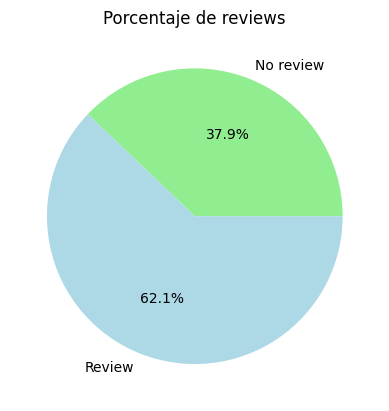

In [12]:
# prompt: quiero una grafica que me relacione el porcentaje de datos nulos de la columna text y los clasifique como no hay review para los datos nulo y si hay para los datos existentes

import matplotlib.pyplot as plt

# Calculate the percentage of null values in the "text" column
null_percent = df_Reviews['text'].isnull().sum() / len(df_Reviews) * 100

# Create a pie chart
labels = ['No review', 'Review']
sizes = [null_percent, 100 - null_percent]
colors = ['lightgreen', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de reviews')
plt.show()


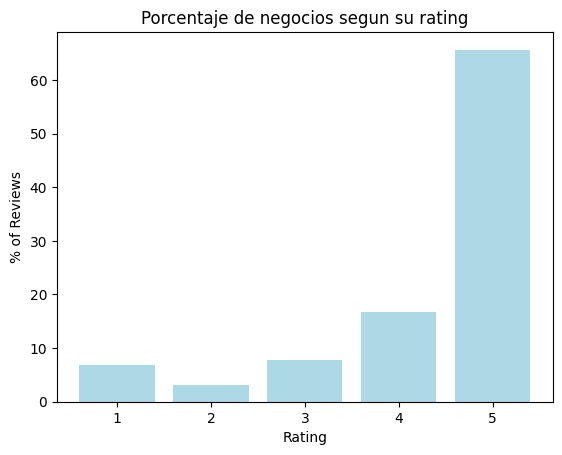

In [15]:
# prompt: ,quiero que hagas una grafica que me cuente la cantidad de valores de rating 1,2,3,4,5, ponle el porcentaje de cada uno

import matplotlib.pyplot as plt

# Count the number of reviews for each rating
rating_counts = df_Reviews['rating'].value_counts()

# Calculate the percentages
percentages = rating_counts / rating_counts.sum() * 100


# Create a bar chart
plt.bar(rating_counts.index, percentages, color = 'lightblue')
plt.xlabel('Rating')
plt.ylabel('% of Reviews')
plt.title('Porcentaje de negocios segun su rating')
plt.show()


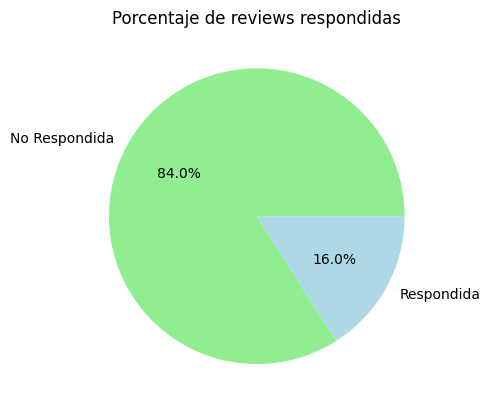

In [9]:

import matplotlib.pyplot as plt

null_percent = df_Reviews['resp'].isnull().sum() * 100 / len(df_Reviews)

non_null_percent = 100 - null_percent

labels = ['No Respondida', 'Respondida']
sizes = [null_percent, non_null_percent]
colors = ['lightgreen', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de reviews respondidas')
plt.show()

df_Reviews['resp'].fillna('No Response', inplace=True)


Como segundo paso realizaremos la importacion del dataset perteneciente a la metadata de los negocios

In [16]:
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/metadata-sitios/1.json',
    '/content/drive/MyDrive/Colab Notebooks/metadata-sitios/2.json',
    '/content/drive/MyDrive/Colab Notebooks/metadata-sitios/3.json',
    ]


dataframes = []

for i, file_path in enumerate(file_paths):
    with jsonlines.open(file_path) as reader:
        data = [line for line in reader]
        df = pd.DataFrame(data)
        df.rename(columns={'name': 'nombre'}, inplace=True)
        df.name = f'df_{i+1}'
        dataframes.append(df)

df_Metadata_sitios = pd.concat(dataframes)

In [17]:
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/metadata-sitios/4.json',
    '/content/drive/MyDrive/Colab Notebooks/metadata-sitios/5.json'
    ]


dataframes = []

for i, file_path in enumerate(file_paths):
    with jsonlines.open(file_path) as reader:
        data = [line for line in reader]
        df = pd.DataFrame(data)
        df.rename(columns={'name': 'nombre'}, inplace=True)
        df.name = f'df_{i+1}'
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
df_Metadata_sitios_2 = pd.concat(dataframes)

In [18]:
df_Metadata_sitios = pd.concat([df_Metadata_sitios, df_Metadata_sitios_2]) # Concatenamos los 5 dataframes

Debido a la cantidad de los datos decidimos hacer este analisis preliminar con el 50 % de los datasets, estos durante dos importaciones de google drive para su posterior concatenacion en un dataset llamado "df_Metadata_sitios"

In [19]:
df_Metadata_sitios.head() # Vista previa de el dataframe df_Metadata_sitios

,nombre,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


En este dataframe contamos con informacion acerca de la meta data de los negocios, como su nombre, direccon, "gmap_id" que recordemos sera la conexion con nuestro dataframe df_Reviews, descripcion, localizacion geografica mediante latitud y longitud, categorias media las cuales clasificaremos a dichos negocios, promedio de rating, cantidad de reviews, un rango de precios, horario de apertura y cierre, "MISC" la contiene informacion acerca de los servicios adicionales como servicio de domicilio, medios de pago, entre otros.

In [20]:
df_Metadata_sitios.isnull().sum() # Cantidad de datos nulos por columna

nombre                   24
address               45383
gmap_id                   0
description         1298053
latitude                  0
longitude                 0
category               9971
avg_rating                0
num_of_reviews            0
price               1295695
hours                399908
MISC                 368552
state                382000
relative_results     161488
url                       0
dtype: int64

In [21]:
df_Metadata_sitios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375005 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   nombre            1374981 non-null  object 
 1   address           1329622 non-null  object 
 2   gmap_id           1375005 non-null  object 
 3   description       76952 non-null    object 
 4   latitude          1375005 non-null  float64
 5   longitude         1375005 non-null  float64
 6   category          1365034 non-null  object 
 7   avg_rating        1375005 non-null  float64
 8   num_of_reviews    1375005 non-null  int64  
 9   price             79310 non-null    object 
 10  hours             975097 non-null   object 
 11  MISC              1006453 non-null  object 
 12  state             993005 non-null   object 
 13  relative_results  1213517 non-null  object 
 14  url               1375005 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 

Como primer analisis podemos ver la cantidad de nulos que tenemos en columnas cruciales como los 9.971 en category, filas las cuales recomendamos eliminar debido a que es el dato mediante el cual clasificaremos dicho negocio para nuestro objetivo, tambien podemos ver que 1'295.695 negocios no cuentan con una categorizacion de precios en el dataframe lo cual puede llegar ser fundamental para un cliente regular en la busqueda de un producto en la plataforma

Realizaremos la conexion de los dataframes a por medio de la columna "gmap_id" para asi ver los negocios que cuentan con reviews, esto con el fin defiltrar nuestra informacion

In [23]:
df_merge = df_Reviews.merge(df_Metadata_sitios, on='gmap_id', how='right')[['nombre_x','nombre_y',  'rating', 'text', 'resp','description', 'latitude', 'longitude', 'category', 'MISC','gmap_id']]
df_merge

,nombre_x,nombre_y,rating,text,resp,description,latitude,longitude,category,MISC,gmap_id
0,NaN,Porter Pharmacy,NaN,NaN,NaN,None,32.388300,-83.357100,[Pharmacy],"{'Service options': ['In-store shopping', 'Sam...",0x88f16e41928ff687:0x883dad4fd048e8f8
1,NaN,City Textile,NaN,NaN,NaN,None,34.018891,-118.215290,[Textile exporter],None,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9
2,NaN,San Soo Dang,NaN,NaN,NaN,None,34.058092,-118.292130,[Korean restaurant],"{'Service options': ['Takeout', 'Dine-in', 'De...",0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,NaN,Nova Fabrics,NaN,NaN,NaN,None,34.023669,-118.232930,[Fabric store],"{'Service options': ['In-store shopping'], 'Pa...",0x80c2c89923b27a41:0x32041559418d447
4,NaN,Nobel Textile Co,NaN,NaN,NaN,None,34.036694,-118.249421,[Fabric store],{'Service options': ['In-store pickup']},0x80c2c632f933b073:0xc31785961fe826a6
...,...,...,...,...,...,...,...,...,...,...,...
1965542,NaN,Skinsational Advanced Skin Care,NaN,NaN,NaN,None,41.994844,-87.661010,[Facial spa],"{'Health & safety': ['Appointment required', '...",0x880fd2616a1097cb:0xa0818059adee7a49
1965543,NaN,Lady Sweet Cafe,NaN,NaN,NaN,None,42.038435,-88.143786,"[Bubble tea store, Ice cream shop]","{'Service options': ['Takeout'], 'Highlights':...",0x880fa91eb54ab89f:0xc4549b9ada136a45
1965544,NaN,Rustic Okie Decor,NaN,NaN,NaN,None,34.925735,-95.743654,[Gift shop],"{'Service options': ['In-store pickup', 'In-st...",0x87b4fd22cd86a999:0x5f5f2c53333b3bbb
1965545,NaN,Westridge Village,NaN,NaN,NaN,None,34.934665,-95.782822,[Housing development],{'Accessibility': ['Wheelchair accessible entr...,0x87b4fce3570ca3c7:0xa7ce51f2467b76dc


Realizamos un right join con el fin de no descartar negocios que no cuentan con reviews debido a que esta data nos puede servir para posteriores analisis como las densidad de negocio en determinadas areas




El siguiente proceso sera realizar un filtor de la columna category con el fin de enfocarnos en nuestra poblacin objetivo, en este caso negocios que tengan como fin el binestra de la salud

In [24]:
df_Metadata_sitios["category"] = df_Metadata_sitios["category"].apply(lambda x: str(x).lower()) # Conversion de la columna a minisculas
import pandas as pd

def filter_dataframe_by_multiple_words(df, column_name, keywords):
  """
  Filters a DataFrame based on multiple keywords in a specific column.

  Args:
      df: The pandas DataFrame to filter.
      column_name: The name of the column to search for keywords.
      keywords: A list of keywords to search for.

  Returns:
      A filtered DataFrame containing rows where the specified column contains at least one of the keywords.
  """

  filtered_df = pd.DataFrame()
  for keyword in keywords:
    filtered_df = pd.concat([filtered_df, df[df[column_name].str.lower().str.contains(keyword.lower(), na=False)]])

  return filtered_df

# Example usage
df = df_Metadata_sitios
column_name = "category"
keywords = ['meditation','fitness','ciclyng','pilates','wellness','boxing','athletic','tennis','health','weightlifting', 'juice', 'vegetarian', 'vegan', 'açaí','salad', 'gluten free', 'gluten-free', 'tofu', 'protein', 'spa', 'chiropractor', 'therapist', 'acunputurist', 'yoga', 'alternative medicine', 'vitamin', 'suplement','organic','fruit','natural', 'aromatherapy', 'nut', 'greengrocer']

filtered_df = filter_dataframe_by_multiple_words(df, column_name, keywords)

# Print the filtered DataFrame
filtered_df

,nombre,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
212,Body & Brain Yoga Tai Chi - The Woodlands,"Body & Brain Yoga Tai Chi - The Woodlands, 7 S...",0x86473751b62e4803:0xdb6e22b7f6d565c4,None,30.140087,-95.471121,"['yoga studio', 'meditation instructor', 'phys...",5.0,37,None,"[[Thursday, 10AM–7:30PM], [Friday, 10AM–3PM], ...",{'From the business': ['Identifies as women-le...,Permanently closed,"[0x864736c80d400001:0xea3f3f6f9f0be214, 0x8647...",https://www.google.com/maps/place//data=!4m2!3...
1088,Gig Harbor Acupuncture & Holistic Health - Kir...,Gig Harbor Acupuncture & Holistic Health - Kir...,0x549052d6cc2d9989:0x7182ee2478356043,None,47.282217,-122.563091,"['acupuncturist', 'acupuncture clinic', 'holis...",4.8,8,None,"[[Thursday, 9AM–3PM], [Friday, 11AM–5PM], [Sat...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9AM,"[0x5490363047a6684d:0x5f6e433612958a9f, 0x5490...",https://www.google.com/maps/place//data=!4m2!3...
1478,iYoga Transformation,"iYoga Transformation, 11887 Evergold St, San D...",0x80dbfbda7e279df3:0x77fb2b251fb8b757,None,32.934083,-117.070621,"['yoga studio', 'life coach', 'massage therapi...",4.7,8,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...",{'From the business': ['Identifies as women-le...,Open 24 hours,"[0x80dbf92bcd2dff8d:0xf20c7100cee49f8e, 0x80db...",https://www.google.com/maps/place//data=!4m2!3...
3577,Chakra Strength,"Chakra Strength, Pierpont Blvd, Ventura, CA 93001",0x80e9ad3f6df72f45:0xd6c2f4ddfeea9610,None,34.256522,-119.267504,['meditation center'],5.0,1,None,None,None,None,"[0x80e9ace4c81311d1:0x53413ca413c324b2, 0x80e9...",https://www.google.com/maps/place//data=!4m2!3...
5043,The River Guild,"The River Guild, 254 N State St Unit E, Concor...",0x89e26adf1d15d963:0x61dbe7253381b37f,None,43.225744,-71.552466,"['holistic medicine practitioner', 'acupunctur...",5.0,3,None,"[[Wednesday, 9AM–3PM], [Thursday, 9AM–3PM], [F...",{'From the business': ['Identifies as women-le...,Permanently closed,"[0x89e26af2a6324e5b:0x537b1b08d13a1e65, 0x89e2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111164,Backyard Bison,"Backyard Bison, 685 Crowthers Rd, Coopersburg,...",0x89c422aa62336015:0x32c5db11427610de,None,40.499779,-75.342168,"['farm', 'greengrocer', 'health food store', '...",5.0,8,None,"[[Monday, Closed], [Tuesday, Closed], [Wednesd...",None,Closed ⋅ Opens 10:30AM Sat,"[0x89c69febdcadd813:0x78663298e9ee101b, 0x89c4...",https://www.google.com/maps/place//data=!4m2!3...
273170,Nourish Market,"Nourish Market, 1260 Blalock Rd ste 130, Houst...",0x8640c4f515740001:0xfab9241d26346e01,None,29.791218,-95.521005,"['health food store', 'greengrocer', 'grocery ...",4.5,14,None,"[[Saturday, 9:30AM–7PM], [Sunday, 10AM–4PM], [...",{'From the business': ['Identifies as women-le...,Open ⋅ Closes 7PM,"[0x8640c4f1b8ec42ad:0x358e2c780d1ddf1c, 0x8640...",https://www.google.com/maps/place//data=!4m2!3...
273171,Georgia's Farm to Market,"Georgia's Farm to Market, 9201 Katy Fwy, Houst...",0x8640c4622454aeb9:0xf184ed692dc22f34,None,29.783493,-95.517938,"['health food store', 'greengrocer', 'grocery ...",4.7,27,None,"[[Saturday, 9AM–7PM], [Sunday, 10AM–4PM], [Mon...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x8640c4f515740001:0xfab9241d26346e01, 0x8640...",https://www.google.com/maps/place//data=!4m2!3...
43505,Heyser Farms,"Heyser Farms, 14526 New Hampshire Ave, Silver ...",0x89b7daaefc7b4d8d:0xede4176d4ec7b02f,None,39.094561,-77.002315,"['produce market', 'cider mill', 'farm', 'frui...",4.6,87,None,"[[Saturday, 9AM–6PM], [Sunday, Closed], [Monda...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 9AM,"[0x89b7ddd74756bf99:0xde2e6a1f39034d45, 0x89b6...",https://www.google.com/maps/place//data=!4m2!3...


Como resultado final no escontramos con 91.530 datos de reviews con infromacion de metadata como punto de partida para realizar el tartamiento profundo de los datos y su posterior analisis.


# **Recomendaciones**


*   Realizar un procesamiento de de los datos, enfocado en el tipo de datos
*   Realizar un analisis estadistico mas detallado con el fin de obeservar la   calidad de los datos y su valor real, tales como valores nulos, duplicados y outliers.
*   Observar el valor que pueden aportar los datos provenientes de el dataset de la plataforma yelp con el fin de complentar la informacion
*   Complementar la cantidad de datos realizando tareas como web scraping en la plataforma de google maps
*   Verficar la veracidad de la informacion de localizacion geografica con librerias de python como folium o geopandas
